## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "csv/Mouse_metadata.csv"
study_results_path = "csv/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata_path)
study_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(study_df,mouse_df,on='Mouse ID', how='left')
data_df.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

# Data Exploration Figures

merge_tot_mice = data_df['Mouse ID'].count()
mouse_tot_mice = mouse_df['Mouse ID'].count()
study_tot_mice = study_df['Mouse ID'].count()
num_unq_merge = data_df['Mouse ID'].nunique()
num_unq_mouse = mouse_df['Mouse ID'].nunique()
num_unq_study = study_df['Mouse ID'].nunique()
num_mis_data = data_df.isnull().any(axis = 1).sum()

# Display figures

print('Mouse MetaData => Total Mice: '+str(mouse_tot_mice)+'   Unique Mice: '+str(num_unq_mouse))
print('Study Results => Total Mice: '+str(study_tot_mice)+'   Unique Mice: '+str(num_unq_study))
print('Merged Data => Total Mice: '+str(merge_tot_mice)+'   Unique Mice: '+str(num_unq_merge))
print(' ')
print('Total Number of Mice Missing Data: '+str(num_mis_data))
print(' ')


Mouse MetaData => Total Mice: 249   Unique Mice: 249
Study Results => Total Mice: 1893   Unique Mice: 249
Merged Data => Total Mice: 1893   Unique Mice: 249
 
Total Number of Mice Missing Data: 0
 


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

num_dup_mice = data_df.pivot_table(columns=['Mouse ID'], aggfunc='size')
num_dup_time = data_df.pivot_table(columns=['Timepoint'], aggfunc='size')

# Number of Duplications by Mice ID
print('List of Duplicated Mice: '+str(len(num_dup_mice)))
print(num_dup_mice)

# Number of Duplications by Timepoint
print(' ')
print('List of Duplicated Timepoints: '+str(len(num_dup_time)))
print(num_dup_time)


List of Duplicated Mice: 249
Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 249, dtype: int64
 
List of Duplicated Timepoints: 10
Timepoint
0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
dtype: int64


In [4]:
# Diplay Duplicated Rows, Groupby Mouse ID and Display Timepoint


grouped_data_df = data_df.groupby(['Mouse ID', 'Timepoint']).sum()
grouped_data_df.head()

#grouped_data_df.head(20)

Tumor Volume (mm3)  Metastatic Sites  Age_months  \
Mouse ID Timepoint                                                     
a203     0                   45.000000                 0          20   
         5                   48.508468                 0          20   
         10                  51.852437                 1          20   
         15                  52.777870                 1          20   
         20                  55.173336                 1          20   

                    Weight (g)  
Mouse ID Timepoint              
a203     0                  23  
         5                  23  
         10                 23  
         15                 23  
         20                 23

In [5]:
## Check to see if there are duplicates within each Timepoint 

tp0_df = data_df[(data_df['Timepoint']==0)]
tp0_val = tp0_df['Mouse ID'].count()
print('Total Mice at Timepoint Zero: '+str(tp0_val))

tp5_df = data_df[(data_df['Timepoint']==5)]
tp5_val = tp5_df['Mouse ID'].count()
print('Total Mice at Timepoint Five: '+str(tp5_val))

tp10_df = data_df[(data_df['Timepoint']==10)]
tp10_val = tp10_df['Mouse ID'].count()
print('Total Mice at Timepoint Ten: '+str(tp10_val))

tp15_df = data_df[(data_df['Timepoint']==15)]
tp15_val = tp15_df['Mouse ID'].count()
print('Total Mice at Timepoint Fifteen: '+str(tp15_val))

tp20_df = data_df[(data_df['Timepoint']==20)]
tp20_val = tp20_df['Mouse ID'].count()
print('Total Mice at Timepoint Twenty: '+str(tp20_val))

tp25_df = data_df[(data_df['Timepoint']==25)]
tp25_val = tp25_df['Mouse ID'].count()
print('Total Mice at Timepoint Zero: '+str(tp25_val))

tp30_df = data_df[(data_df['Timepoint']==30)]
tp30_val = tp30_df['Mouse ID'].count()
print('Total Mice at Timepoint Zero: '+str(tp30_val))

tp35_df = data_df[(data_df['Timepoint']==35)]
tp35_val = tp35_df['Mouse ID'].count()
print('Total Mice at Timepoint Zero: '+str(tp35_val))

tp40_df = data_df[(data_df['Timepoint']==40)]
tp40_val = tp40_df['Mouse ID'].count()
print('Total Mice at Timepoint Zero: '+str(tp40_val))

tp45_df = data_df[(data_df['Timepoint']==45)]
tp45_val = tp45_df['Mouse ID'].count()
print('Total Mice at Timepoint Zero: '+str(tp45_val))


print('Total Mice from DataSet: '+str(data_df['Mouse ID'].count()))

sum_val = tp0_val+tp5_val+tp10_val+tp15_val+tp20_val+tp25_val+tp30_val+tp35_val+tp40_val+tp45_val
print('Total Sum of Mice: '+str(sum_val))


Total Mice at Timepoint Zero: 250
Total Mice at Timepoint Five: 238
Total Mice at Timepoint Ten: 223
Total Mice at Timepoint Fifteen: 207
Total Mice at Timepoint Twenty: 195
Total Mice at Timepoint Zero: 183
Total Mice at Timepoint Zero: 171
Total Mice at Timepoint Zero: 154
Total Mice at Timepoint Zero: 142
Total Mice at Timepoint Zero: 130
Total Mice from DataSet: 1893
Total Sum of Mice: 1893


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

# Note all Timepoints have less than 249 (number of unique mice) except for Timepoint 0 

dup_tp0_df = tp0_df[tp0_df.duplicated()]
print(dup_tp0_df)


    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137     g989          0                45.0                 0     Propriva   

        Sex  Age_months  Weight (g)  
137  Female          21          26  


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_df = data_df.drop_duplicates()
tp0_df = tp0_df.drop_duplicates()

# Checking the number of mice in the clean DataFrame.

print('Number of Mice in Total DataSet: '+str(len(data_df)))
print('Number of Mice at Timepoint Zero: '+str(len(tp0_df)))


Number of Mice in Total DataSet: 1892
Number of Mice at Timepoint Zero: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

def statsy(df):
    
    # Calculate Tumor Mean
    t_mean = '{:,.2f}'.format(np.mean(df['Tumor Volume (mm3)']))
    
    # Calculate Tumor Median
    t_med = '{:,.2f}'.format(np.median(df['Tumor Volume (mm3)']))
    
    # Calculate Tumor Variance
    t_var = '{:,.2f}'.format(np.var(df['Tumor Volume (mm3)']))
    
    # Calculate Tumor Standard Deviation
    t_std = '{:,.2f}'.format(np.std(df['Tumor Volume (mm3)']))
    
    # Calculate Tumor Standard Error of Mean
    sample = data_df['Tumor Volume (mm3)'].sample(30)
    sem_val = '{:,.2f}'.format(st.sem(sample, axis=0,ddof=0))
    
    return pd.Series({'Mean':t_mean,
                      'Median':t_med,
                      'Variance':t_var,
                      'Std Dev':t_std,
                      'SEM':sem_val
                     })

print(' ')
print('Tumor Size (mm3) Statisitics for All Timepoints')
reg_data_df = data_df.groupby('Drug Regimen').apply(statsy)
reg_data_df.head(10)


 
Tumor Size (mm3) Statisitics for All Timepoints


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.84,4.98,1.68
Ceftamin,52.59,51.78,39.07,6.25,1.97
Infubinol,52.88,51.82,42.89,6.55,1.53
Ketapril,55.24,53.70,68.19,8.26,1.51
Naftisol,54.33,52.51,65.82,8.11,1.90
Placebo,54.03,52.29,60.83,7.80,1.65
Propriva,52.37,50.91,42.01,6.48,1.60
Ramicane,40.22,40.67,23.38,4.84,1.68
Stelasyn,54.23,52.43,59.12,7.69,1.32


## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

tot_tps = data_df.groupby('Drug Regimen')['Timepoint'].sum()
tot_tps_df = pd.DataFrame(tot_tps)
tot_tps_df.head()
#tot_tps_df.dtypes


,Timepoint
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650


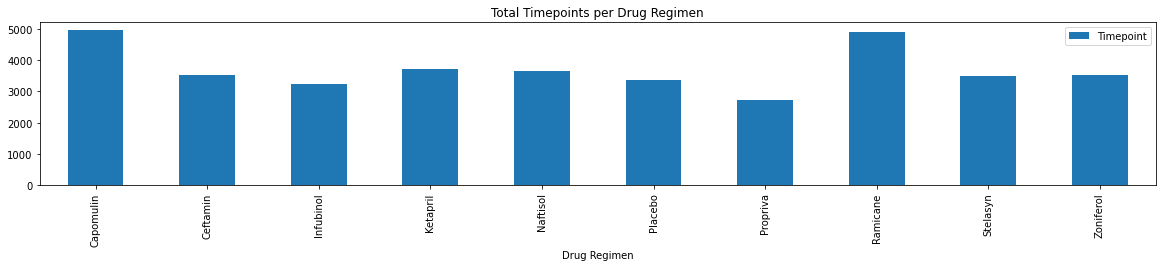

<Figure size 432x288 with 0 Axes>

In [10]:
# Use DataFrame.plot() in order to create a bar chart of the data
tot_tps_df.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Total Timepoints per Drug Regimen")

plt.show()
plt.tight_layout()

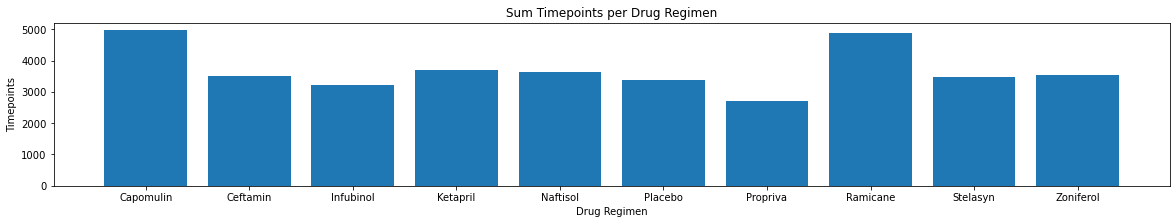

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

tot_tps_df = tot_tps_df.reset_index()
tps = tot_tps_df['Timepoint'].tolist()
labels = tot_tps_df['Drug Regimen'].tolist()

plt_1 = plt.figure(figsize=(20, 3))
plt.xticks(range(len(tps)), labels)
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoints')
plt.title('Sum Timepoints per Drug Regimen')
plt.bar(range(len(tps)), tps) 
plt.show()


([<matplotlib.patches.Wedge at 0x26cdc6a31f0>,
 [Text(-0.7237151467475075, -0.8283938594462383, 'Female'),
  Text(0.7237152243073345, 0.8283937916871327, 'Male')],
 [Text(-0.3947537164077313, -0.45185119606158447, '49.4%'),
  Text(0.39475375871309154, 0.4518511591020723, '50.6%')])

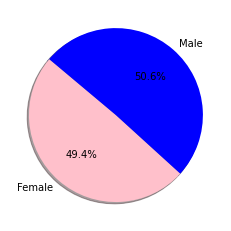

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

tot_gnd = data_df.groupby('Sex')['Mouse ID'].count()
tot_gnd_df = pd.DataFrame(tot_gnd)
tot_gnd_df = tot_gnd_df.rename(columns = {'Mouse ID':'Amount'})
tot_gnd_df = tot_gnd_df.reset_index()
tot_gnd_df.head()

labels = tot_gnd_df['Sex'].tolist()
amount = tot_gnd_df['Amount'].tolist()
colors = ['pink','blue']
explode = [0,0]

plt.pie(amount, explode=explode, labels=labels, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=140)


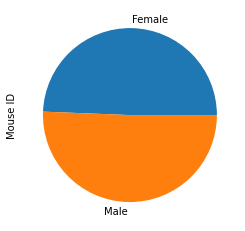

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


tot_tps = data_df.groupby('Sex')['Mouse ID'].count().plot(kind='pie',y='Mouse ID')



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

data_df_lst = data_df.sort_values('Mouse ID').drop_duplicates('Mouse ID',keep='last')
data_df_lst = data_df_lst.astype({'Tumor Volume (mm3)':'int'})
data_df_lst.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1315,a203,30,59,1,Infubinol,Female,20,23
729,a251,15,50,1,Infubinol,Female,21,25
1263,a262,25,60,2,Placebo,Female,17,29
1665,a275,40,60,3,Ceftamin,Female,20,28
1401,a366,30,63,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = data_df_lst['Tumor Volume (mm3)']

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print('Lower Quartile: '+str(lowerq))
print('Upper Quartile: '+str(upperq))
print('IQR Value: '+str(iqr))


    

Lower Quartile: 45.0
Upper Quartile: 54.0
IQR Value: 9.0


In [17]:
# Locate the rows which contain mice on each drug and get the tumor volumes

data_df_out = data_df_lst.loc[(data_df_lst['Tumor Volume (mm3)']<lowerq)|(data_df_lst['Tumor Volume (mm3)']>upperq)] 

data_df_out.head(20)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1315,a203,30,59,1,Infubinol,Female,20,23
1263,a262,25,60,2,Placebo,Female,17,29
1665,a275,40,60,3,Ceftamin,Female,20,28
1401,a366,30,63,1,Stelasyn,Female,16,29
877,a411,15,41,1,Ramicane,Male,3,22
275,a444,5,44,0,Ramicane,Female,10,25
634,a520,10,36,0,Ramicane,Male,13,21
1140,a818,25,56,0,Naftisol,Female,12,28
1220,a897,25,56,3,Placebo,Male,7,28
933,b128,20,42,0,Capomulin,Female,9,22


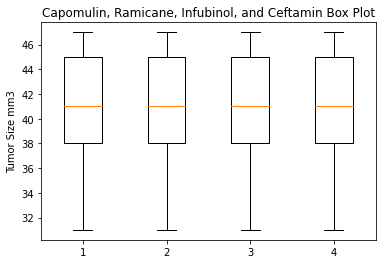

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = data_df_lst.loc[data_df_lst['Drug Regimen']=='Capomulin']
cap_list = cap_df['Tumor Volume (mm3)'].tolist()

ram_df = data_df_lst.loc[data_df_lst['Drug Regimen']=='Capomulin']
ram_list = ram_df['Tumor Volume (mm3)'].tolist()

inf_df = data_df_lst.loc[data_df_lst['Drug Regimen']=='Capomulin']
inf_list = inf_df['Tumor Volume (mm3)'].tolist()

cef_df = data_df_lst.loc[data_df_lst['Drug Regimen']=='Capomulin']
cef_list = cef_df['Tumor Volume (mm3)'].tolist()



drug_df = pd.DataFrame({"Capomulin":cap_list,
                        'Ramicane':ram_list,
                        'Infubinol':inf_list,
                        'Ceftamin':cef_list
                        })

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin, Ramicane, Infubinol, and Ceftamin Box Plot')
ax1.set_ylabel('Tumor Size mm3')
ax1.boxplot(drug_df)
plt.show()

## Line and Scatter Plots

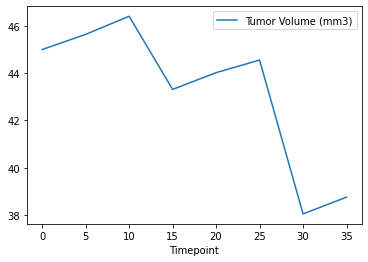

In [45]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

data_cap = data_df.loc[data_df['Drug Regimen']=='Capomulin']

# Use j246

data_cap = data_df.loc[data_df['Mouse ID']=='j246']
data_cap= data_cap.drop(['Mouse ID','Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)'],axis=1)
ax = data_cap.plot.line(x='Timepoint',y='Tumor Volume (mm3)')



<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

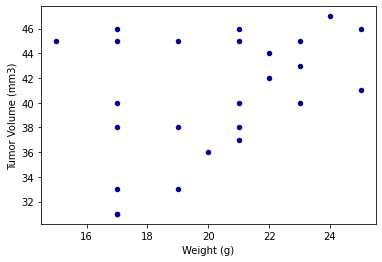

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

cap1_df = data_df_lst.loc[data_df_lst['Drug Regimen']=='Capomulin']
cap1_df= cap1_df.drop(['Mouse ID','Timepoint','Metastatic Sites','Drug Regimen','Sex','Age_months'],axis=1)
#cap1_df.head()

cap1_df.plot.scatter(x='Weight (g)',y='Tumor Volume (mm3)',c='DarkBlue')

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



 # Add the linear regression equation and line to plot
x_values = cap1_df['Weight (g)']
y_values = cap1_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()



NameError: name 'linregress' is not defined